# Matplotlib
Same as before, first thing we do is import necessary packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

This notebook will go through a lot of examples, but matplotlib
has pretty good [documentation](http://matplotlib.org/api/pyplot_api.html) and a 
[gallery of examples](http://matplotlib.org/1.5.1/gallery.html).  They also
have a [pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
that might be helpful in addition to the examples shown here.

Often, it is helpful to find an example in the gallery of what you are looking for
and then view the code for how to create that plot.

# Starting simple

What about just a simple plot?

Simple plot of some random numbers.  Note that range of x values is assumed from 0 to n-1
if no range is specified.

This uses np.random.random_integers().  See the numpy demo notebook for examples of numpy's random number generation functions.

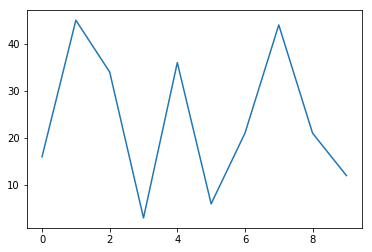

In [4]:
yvals = np.random.randint(0,51,10)
plt.plot(yvals)
plt.show()

What if we have x-values we want to provide too?

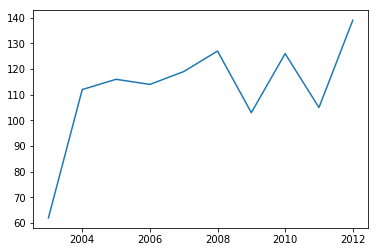

In [5]:
xvals = np.arange(2003,2013,1)
yvals = [62,112,116,114,119,127,103,126,105,139]
plt.plot(xvals, yvals)
plt.show()

Note that the arguments could be arrays or lists, it didn't matter.

# Adding titles and labels

Those previous graphs had no labels.  Good plots have axes labels and titles, so how do we add them?

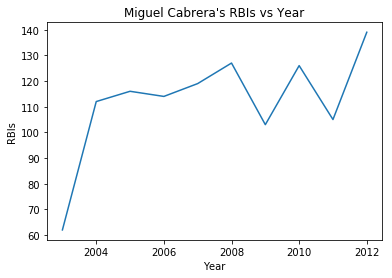

In [7]:
plt.xlabel('Year')
plt.ylabel('RBIs')
plt.title('Miguel Cabrera\'s RBIs vs Year')
plt.plot(xvals, yvals)
plt.show()

# Changing line style, color

That plot still doesn't look great, how can I make it look better?

You can specify the line color, style, etc. that you want.

This plot changes the line color to red, adds circle markers at the data points,
and changes the line width to be thicker.

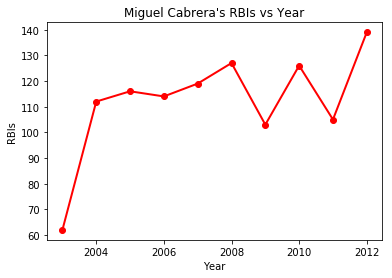

In [9]:
plt.xlabel('Year')
plt.ylabel('RBIs')
plt.title('Miguel Cabrera\'s RBIs vs Year')
plt.plot(xvals,yvals,'ro-',linewidth=2)
plt.show()

# Multiple lines on a single plot

Can easily add multiple lines to a single plot by just calling `plt.plot()` with the data for each different line.

If you do have multiple lines on one plot, it is always good to have a legend as well.
To add a legend, specify the label='some label' when plotting each of the data and then
call plt.legend().  You can specify where the legend is placed by specifying a location
(see matplotlib's documentation for location details).

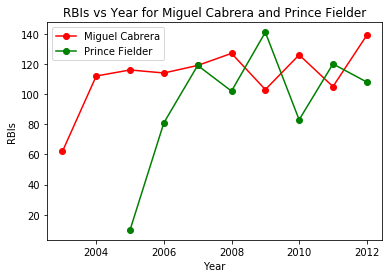

In [10]:
xvals2 = np.arange(2005,2013,1)
yvals2 = [10,81,119,102,141,83,120,108]

plt.xlabel('Year')
plt.ylabel('RBIs')
plt.title('RBIs vs Year for Miguel Cabrera and Prince Fielder')

plt.plot(xvals, yvals, 'ro-', label='Miguel Cabrera')
plt.plot(xvals2, yvals2, 'go-', label='Prince Fielder')
plt.legend(loc=2)

plt.show()

# Examples of More Line Styles
We've seen how to change line thickness, line style, and line color.  There are quite a few options for line styles, colors, etc.

For example, sometimes it is helpful to plot just markers (no lines connecting them).  Or, you might want to use a dashed line instead of a solid line or change to a differnet shaped marker.  This example just shows a couple more options.  There are tons of options available though -- see matplotlib's documentation or gallery.

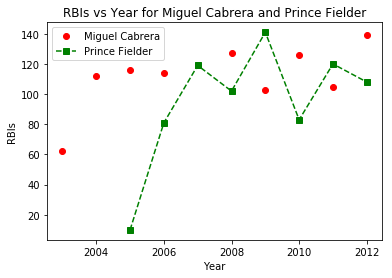

In [11]:
xvals2 = np.arange(2005,2013,1)
yvals2 = [10,81,119,102,141,83,120,108]

plt.xlabel('Year')
plt.ylabel('RBIs')
plt.title('RBIs vs Year for Miguel Cabrera and Prince Fielder')

plt.plot(xvals, yvals, 'ro', label='Miguel Cabrera')
plt.plot(xvals2, yvals2, 'gs--', label='Prince Fielder')
plt.legend(loc=2)

plt.show()

# Logarithmic Axis Scales
Options available for doing log-log and semilog axis scales available.

This example also shows how to make separate figures -- call plt.figure() before
plotting the data you want on each plot.

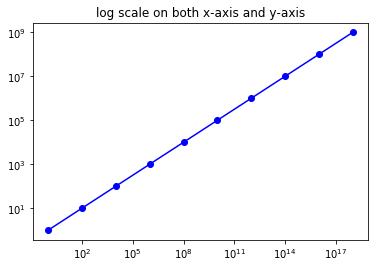

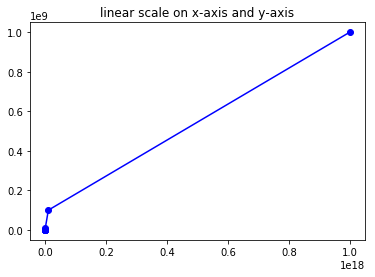

In [12]:
a = np.arange(10)

plt.figure()
xs = 10**(2*a)
ys = 10**a
plt.loglog(xs, ys, 'bo-')
plt.title('log scale on both x-axis and y-axis')
plt.show()

# The same data plotted with plt.plot()
plt.figure()
plt.plot(xs, ys, 'bo-')
plt.title('linear scale on x-axis and y-axis')
plt.show()

The same exact data is plotted in both of the above, just using different
scales for the axes.  Note we can only really see a couple of the data points
in the second plot.

We can also do log scaling on only one axis (x or y).

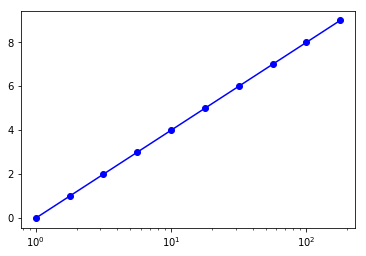

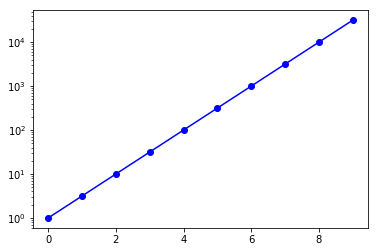

In [13]:
a = np.arange(10)

plt.figure()
xs = 10**(0.25*a)
ys = a
plt.semilogx(xs, ys, 'bo-')
plt.show()

plt.figure()
xs = a
ys = 10**(0.5*a)
plt.semilogy(xs, ys, 'bo-')
plt.show()

Note, these were straight lines as plotted, but would have looked very different
on an ordinary plot (using plt.plot())  

# Some Fancier Options

## Multiple Subplots
How to add multiple subplots on one figure (you could also do two separate plots)

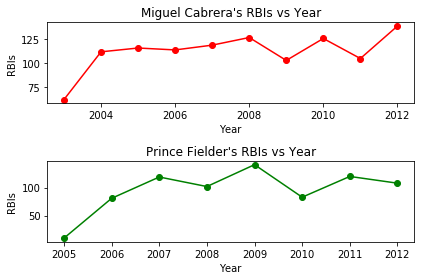

In [15]:
plt.figure(1)

plt.subplot(211)
plt.xlabel('Year')
plt.ylabel('RBIs')
plt.title("Miguel Cabrera's RBIs vs Year")
plt.plot(xvals,yvals,'ro-')

plt.subplot(212)
plt.xlabel('Year')
plt.ylabel('RBIs')
plt.title("Prince Fielder's RBIs vs Year")
plt.plot(xvals2,yvals2,'go-')

plt.tight_layout()
plt.show()

The x-axis and y-axis ranges are different on each subplot, can we force it to be the same?

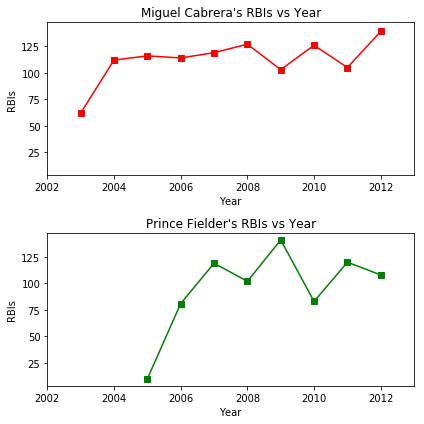

In [26]:
def format_axis(ax):
    ax.set_xlim((2002, 2013))

    ax.set_xlabel('Year')
    ax.set_ylabel('RBIs')

fig, (ax0,ax1) = plt.subplots(nrows=2, sharey=True, figsize=(6,6))

ax0.plot(xvals,yvals,'rs-')
ax0.set_title('Miguel Cabrera\'s RBIs vs Year')
format_axis(ax0)

ax1.plot(xvals2,yvals2,'gs-')
ax1.set_title('Prince Fielder\'s RBIs vs Year')
format_axis(ax1)

plt.tight_layout()
plt.show()

Note: could have used `sharex=True` argument to `plt.subplots`
instead of manually setting xlim for each, but then tick labels
would only appear for bottom plot